<a href="https://colab.research.google.com/github/babypotatotang/Tobigs/blob/main/Dacon/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%20%EC%82%AC%EA%B8%B0%EA%B1%B0%EB%9E%98%20%ED%83%90%EC%A7%80%20AI%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Settings**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/신용카드 사기 거래 탐지 AI'

train_df = pd.read_csv('train.csv',index_col=0)
val_df = pd.read_csv('val.csv',index_col=0)

print(train_df.shape)
print(val_df.shape) 

In [2]:
train_df = pd.read_csv('D:\\2022\\Tobigs\\Dacon\\신용카드 사기거래 탐지 AI 경진대회\\Data\\train.csv')
val_df = pd.read_csv('D:\\2022\\Tobigs\\Dacon\\신용카드 사기거래 탐지 AI 경진대회\\Data\\val.csv',index_col=0)

* Val에는 class column이 있어서 31개 shape을 가짐

## **Statistics**
* 표준화데이터 아님.
* train과 val 모두 변수 V29가 180으로 다른 변수들 보다 값이 높음. 

In [ ]:
train_df.describe()

In [ ]:
val_df.describe()

In [ ]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

## **Correlation**
### **Train**
* V29와 V30외에는 뚜렷한 상관성을 파악하지 못했음.

<AxesSubplot:>

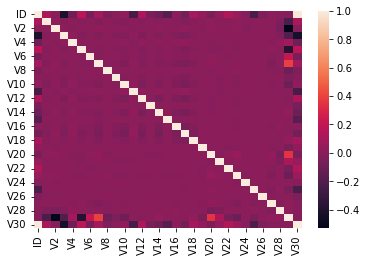

In [3]:
MatCor = train_df.corr()
sns.heatmap(MatCor)

## **Val**
* Validation Dataset의 경우 fraud normal을 나누어서 상관성 분석
* normal
    * train set와 유사한 결과
    * 각 변수 별 유의미한 상관성 파악 x
* fraud
    * 변수별로 강한 상관관계를 가짐 
        * V2, V4, V16 등 
        * pca 성분 추출? 
        * clustering? 

In [4]:
# fraud 와 normal 나누기
Groups = val_df.groupby(val_df.Class)
val_fraud = Groups.get_group(1)
val_normal = Groups.get_group(0)

<AxesSubplot:>

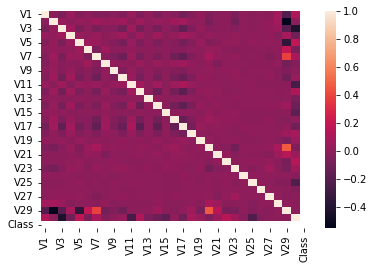

In [5]:
# normal
sns.heatmap(val_normal.corr())

<AxesSubplot:>

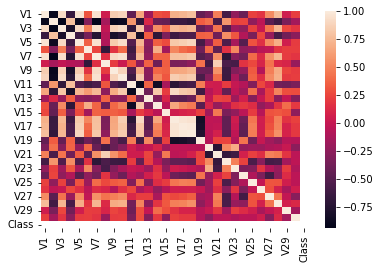

In [7]:
# fraud 
sns.heatmap(val_fraud.corr())

In [13]:
corr = train_df.corr(method = 'pearson')
print(corr)

           ID        V1        V2        V3        V4        V5        V6  \
ID   1.000000  0.112910  0.000845 -0.414916 -0.100227  0.171102 -0.061731   
V1   0.112910  1.000000  0.015507 -0.015559  0.005334 -0.009902 -0.000177   
V2   0.000845  0.015507  1.000000  0.015350 -0.004632  0.005220  0.004119   
V3  -0.414916 -0.015559  0.015350  1.000000  0.014562 -0.021869 -0.000392   
V4  -0.100227  0.005334 -0.004632  0.014562  1.000000  0.009886  0.001191   
V5   0.171102 -0.009902  0.005220 -0.021869  0.009886  1.000000 -0.000701   
V6  -0.061731 -0.000177  0.004119 -0.000392  0.001191 -0.000701  1.000000   
V7   0.081595 -0.021839  0.020025 -0.023424  0.011269 -0.012571 -0.010017   
V8  -0.034201  0.003626  0.002628  0.002836  0.000271 -0.000730  0.008153   
V9  -0.002427 -0.009599  0.001865 -0.017386  0.008993 -0.006367 -0.004149   
V10  0.024556 -0.019278  0.011013 -0.028125  0.015209 -0.015695 -0.008792   
V11 -0.238616  0.003578 -0.006297  0.014767 -0.011847  0.012430  0.002667   

In [14]:
corr.to_csv('Data\\Feature Correlation_train.csv')

In [ ]:
corr.loc[corr['']]